<a href="https://colab.research.google.com/github/ankit-singh973/Deep_Learning_tensorflow/blob/main/4_CNN_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BINARY CLASSIFICATION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2023-12-25 05:05:07.928965


In [ ]:
import pandas as pd
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-12-25 05:05:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.8MB/s    in 5.7s    

2023-12-25 05:05:15 (18.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### **The dataset has only two classes**
> **pizza**

> **steak**
--------------------------------------
## **Let's be familiar with data**

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Dec 25 05:05 .
drwxr-xr-x 1 root root 4096 Dec 25 05:05 ..
drwxr-xr-x 4 root root 4096 Dec 25 05:05 test
drwxr-xr-x 4 root root 4096 Dec 25 05:05 train


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


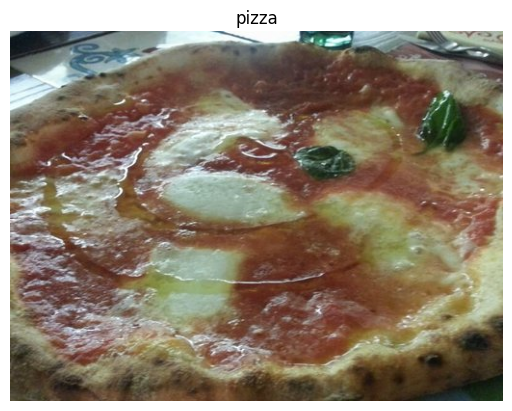

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza") #you can change it to "steak" also

In [ ]:
img

array([[[130, 144, 144],
        [132, 146, 146],
        [131, 145, 145],
        ...,
        [169, 183, 158],
        [166, 180, 155],
        [163, 177, 151]],

       [[129, 143, 143],
        [129, 143, 143],
        [126, 140, 140],
        ...,
        [158, 170, 146],
        [162, 174, 150],
        [167, 180, 154]],

       [[121, 135, 135],
        [120, 134, 134],
        [119, 133, 134],
        ...,
        [170, 180, 156],
        [170, 180, 156],
        [170, 180, 155]],

       ...,

       [[ 87,  80,  61],
        [ 87,  80,  61],
        [ 85,  78,  59],
        ...,
        [ 28,  51,  25],
        [ 34,  54,  29],
        [ 32,  52,  27]],

       [[ 85,  79,  57],
        [ 87,  81,  59],
        [ 88,  82,  60],
        ...,
        [ 29,  51,  28],
        [ 35,  54,  32],
        [ 35,  54,  32]],

       [[ 81,  75,  53],
        [ 85,  79,  57],
        [ 91,  85,  63],
        ...,
        [ 30,  52,  29],
        [ 39,  58,  36],
        [ 40,  59,  37]]

## **Our image is red in form of big array, so we will convert it in form of tensor which can be used as input data for our neural networks**

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[130, 144, 144],
        [132, 146, 146],
        [131, 145, 145],
        ...,
        [169, 183, 158],
        [166, 180, 155],
        [163, 177, 151]],

       [[129, 143, 143],
        [129, 143, 143],
        [126, 140, 140],
        ...,
        [158, 170, 146],
        [162, 174, 150],
        [167, 180, 154]],

       [[121, 135, 135],
        [120, 134, 134],
        [119, 133, 134],
        ...,
        [170, 180, 156],
        [170, 180, 156],
        [170, 180, 155]],

       ...,

       [[ 87,  80,  61],
        [ 87,  80,  61],
        [ 85,  78,  59],
        ...,
        [ 28,  51,  25],
        [ 34,  54,  29],
        [ 32,  52,  27]],

       [[ 85,  79,  57],
        [ 87,  81,  59],
        [ 88,  82,  60],
        ...,
        [ 29,  51,  28],
        [ 35,  54,  32],
        [ 35,  54,  32]],

       [[ 81,  75,  53],
        [ 85,  79,  57],
        [ 91,  85,  63],
        ...,
        [ 30,  52,  2

In [ ]:
# view the image shape
img.shape # returns (width, height color channels)

(384, 512, 3)

In [ ]:
# Normalization = get all the pixel values between 0 and 1
img/255.0

array([[[0.50980392, 0.56470588, 0.56470588],
        [0.51764706, 0.57254902, 0.57254902],
        [0.51372549, 0.56862745, 0.56862745],
        ...,
        [0.6627451 , 0.71764706, 0.61960784],
        [0.65098039, 0.70588235, 0.60784314],
        [0.63921569, 0.69411765, 0.59215686]],

       [[0.50588235, 0.56078431, 0.56078431],
        [0.50588235, 0.56078431, 0.56078431],
        [0.49411765, 0.54901961, 0.54901961],
        ...,
        [0.61960784, 0.66666667, 0.57254902],
        [0.63529412, 0.68235294, 0.58823529],
        [0.65490196, 0.70588235, 0.60392157]],

       [[0.4745098 , 0.52941176, 0.52941176],
        [0.47058824, 0.5254902 , 0.5254902 ],
        [0.46666667, 0.52156863, 0.5254902 ],
        ...,
        [0.66666667, 0.70588235, 0.61176471],
        [0.66666667, 0.70588235, 0.61176471],
        [0.66666667, 0.70588235, 0.60784314]],

       ...,

       [[0.34117647, 0.31372549, 0.23921569],
        [0.34117647, 0.31372549, 0.23921569],
        [0.33333333, 0

## **End to End Project**
- Load our images
- Preprocess our images
- Build a CNN to find patterns in our images
- Compile our CNN
- Fit the CNN to our training data

# New section

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Create train and test data generators
# Preprocess data (get all pixel values between 0 & 1)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32, #number of images to process at a time
                                               target_size = (224, 224), # convert all images to be 224 x 224
                                               class_mode = "binary", # type of problem we're working on
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                                 padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])




In [ ]:
# Compile our CNN
model_1.compile(loss = "binary_crossentropy",
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data ),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 185ms/step - loss: 0.5556 - accuracy: 0.7153 - val_loss: 0.4608 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 7s 160ms/step - loss: 0.4175 - accuracy: 0.8207 - val_loss: 0.3512 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 6s 127ms/step - loss: 0.3884 - accuracy: 0.8287 - val_loss: 0.3487 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 6s 132ms/step - loss: 0.3433 - accuracy: 0.8633 - val_loss: 0.3398 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 8s 171ms/step - loss: 0.3218 - accuracy: 0.8667 - val_loss: 0.2879 - val_accuracy: 0.8920


<Axes: >

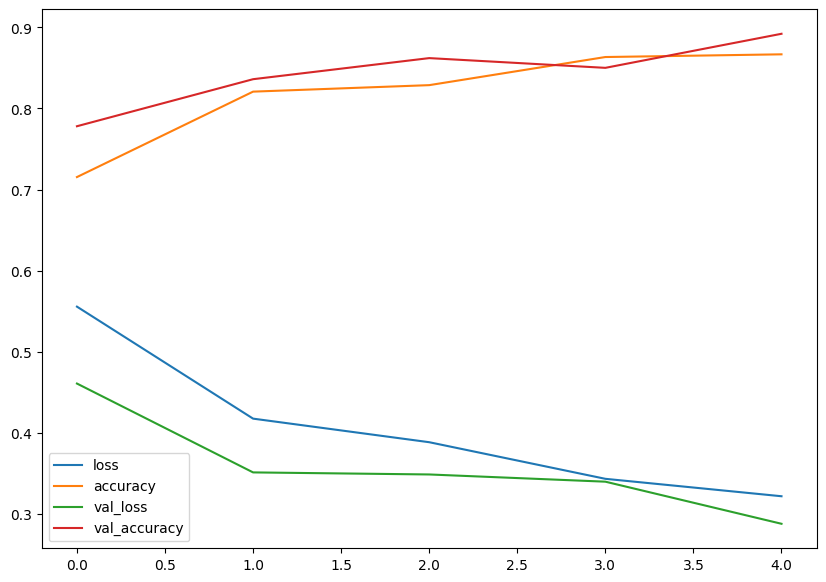

In [ ]:
pd.DataFrame(history_1.history).plot(figsize = (10, 7))

In [ ]:
# get the model smmary

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
tf.random.set_seed(42)

# create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 117ms/step - loss: 3.7787 - accuracy: 0.6047 - val_loss: 4.0136 - val_accuracy: 0.5320
Epoch 2/5
47/47 [==============================] - 8s 165ms/step - loss: 0.9556 - accuracy: 0.7173 - val_loss: 0.6111 - val_accuracy: 0.7200
Epoch 3/5
47/47 [==============================] - 6s 116ms/step - loss: 0.6010 - accuracy: 0.7453 - val_loss: 0.4378 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 6s 137ms/step - loss: 0.7577 - accuracy: 0.7200 - val_loss: 0.5843 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6804 - accuracy: 0.7347 - val_loss: 0.5382 - val_accuracy: 0.7700


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Steps performed to build Model**

1. Become one with the data.
2. Preprocess the data (scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust the different parameters and improve the model
7. Repeat untill satisfied.

## **2. Preprocess the Data**


In [ ]:
# Define directory dataset paths

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

### **Our next step is to turn our data into `batches`.**

> * A batch is small subset of data.
> * Rather than look at all ~10k images at one time, a model might only look at 32 at a time

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model
model_3 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = "valid",
           activation = "relu",
           input_shape = (224, 224, 3)), #input layer (specify input shape)
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid") # output layer
])

In [ ]:
len(train_data), len(valid_data)

(47, 16)

In [ ]:
# compile the model
model_3.compile(optimizer = Adam(),
                loss = "binary_crossentropy",
                metrics = ["accuracy"])
# fit the model
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 156ms/step - loss: 1.1978 - accuracy: 0.5887 - val_loss: 0.5799 - val_accuracy: 0.6720
Epoch 2/5
47/47 [==============================] - 7s 147ms/step - loss: 0.5377 - accuracy: 0.7427 - val_loss: 0.4159 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 6s 124ms/step - loss: 0.4129 - accuracy: 0.8207 - val_loss: 0.3981 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 6s 130ms/step - loss: 0.2692 - accuracy: 0.8993 - val_loss: 0.3862 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 7s 150ms/step - loss: 0.1643 - accuracy: 0.9467 - val_loss: 0.4299 - val_accuracy: 0.8060


## **5. Evaluating our model**
> * It's looks like our model is learning something, let's evaluate it

<Axes: >

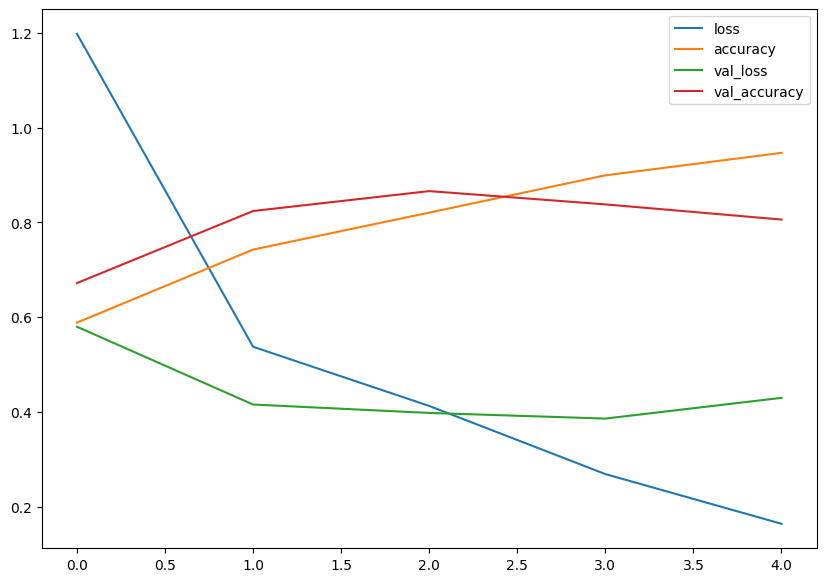

In [ ]:
pd.DataFrame(history_3.history).plot(figsize = (10, 7))

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

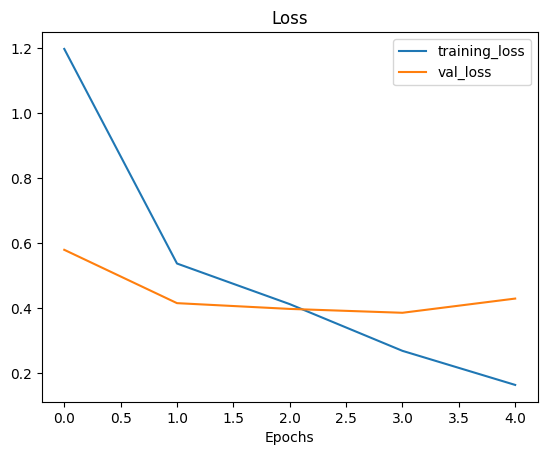

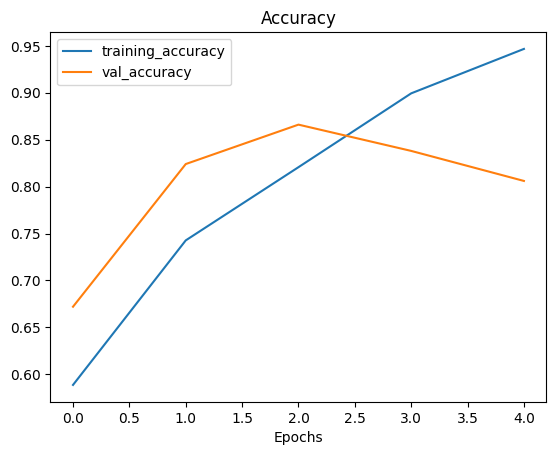

In [ ]:
plot_loss_curves(history_3)

# **NOTE:**
> * Whenever a model's **validation loss starts to increase**, it's likely that model is **overfitting** the training dataset.
> * Model's ability to generalize on unseen data is diminished.

# **6. Adjust the model parameters**

**Fitting a machine learning model comes in 3 steps:**
0. Create a base line
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

**Ways to induce overfitting:**
> * Increase number of conv layers
> * Increase the number of conv filters
> * Add another dense layer to the output of our flattened layer

**Reduce overfitting:**
> * Add data agumentation
> * Add regularization layer (such MaxPool2D)
> * Add more data

### **The process removing overfitting is k/a `Regularization`**

In [ ]:
# create the model
model_5 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])


In [ ]:
history_5 = model_5.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 158ms/step - loss: 0.6761 - accuracy: 0.5887 - val_loss: 0.5716 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 6s 131ms/step - loss: 0.5150 - accuracy: 0.7567 - val_loss: 0.4243 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 7s 147ms/step - loss: 0.4627 - accuracy: 0.7813 - val_loss: 0.3977 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 6s 117ms/step - loss: 0.4292 - accuracy: 0.8120 - val_loss: 0.3692 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 8s 161ms/step - loss: 0.3833 - accuracy: 0.8327 - val_loss: 0.3321 - val_accuracy: 0.8480


In [ ]:
# get a summary of our model_5
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

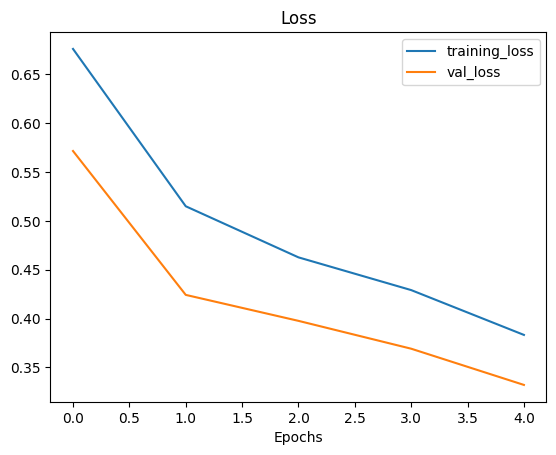

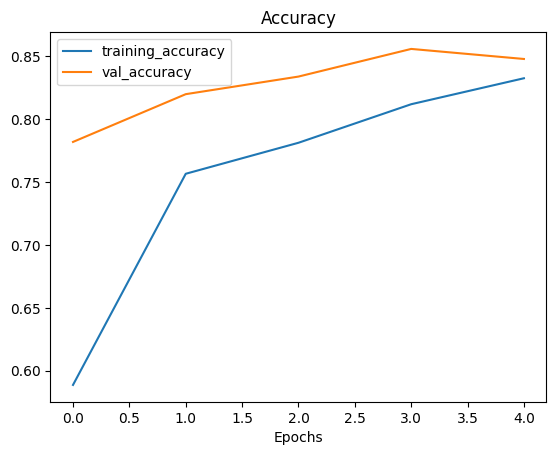

In [ ]:
plot_loss_curves(history_5)

## **Data Augmentation**
> **Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns.

> Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

> **Data augmentation is only performed on training data**

> Labels aren't augmented.

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.3,
                                             horizontal_flip = True)

# Create imagedatagenerator without data augemntation for train data
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create imagedatagenerator without data augemntation for test data
test_datagen = ImageDataGenerator(rescale = 1/255.)


### **Let's write some code for data augmentation**

In [ ]:
# Import data and augment it form training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = "binary",
                                                                   shuffle = False # 'shuffle = True' is good model training
                                                                   )

#create non-augmented train data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = "binary",
                                                shuffle = False)

# Ceate non-augmented test data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = "binary",
                                                shuffle = False)

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
# get some sample data batches
images,labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number : 14


Text(0.5, 1.0, 'Augmented images')

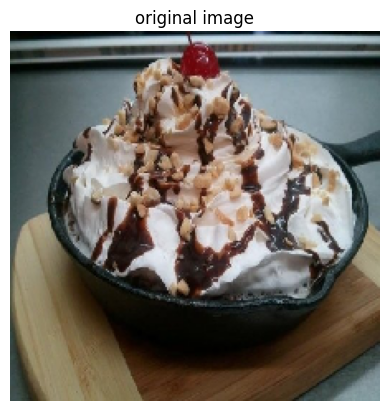

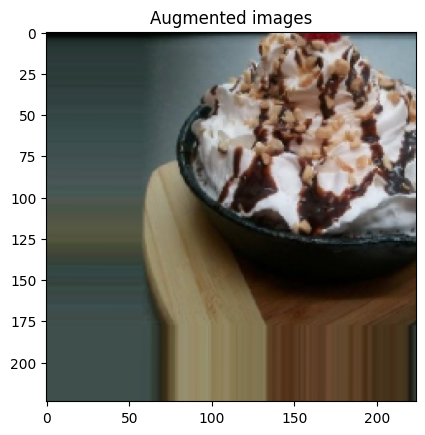

In [ ]:
# show original image and augmented image
import random
random_number = random.randint(0, 32)
print(f"showing image number : {random_number}")
plt.imshow(images[random_number])
plt.title(f"original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented images")

In [ ]:
# create the model
model_6 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

In [ ]:
model_6.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])


In [ ]:
history_6 = model_6.fit(train_data_augmented,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 506ms/step - loss: 0.6756 - accuracy: 0.5647 - val_loss: 0.6500 - val_accuracy: 0.5940
Epoch 2/5
47/47 [==============================] - 23s 482ms/step - loss: 0.6265 - accuracy: 0.6487 - val_loss: 0.5534 - val_accuracy: 0.7400
Epoch 3/5
47/47 [==============================] - 25s 541ms/step - loss: 0.5960 - accuracy: 0.6687 - val_loss: 0.4246 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 24s 521ms/step - loss: 0.5454 - accuracy: 0.7200 - val_loss: 0.3891 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 23s 493ms/step - loss: 0.4908 - accuracy: 0.7747 - val_loss: 0.3538 - val_accuracy: 0.8260


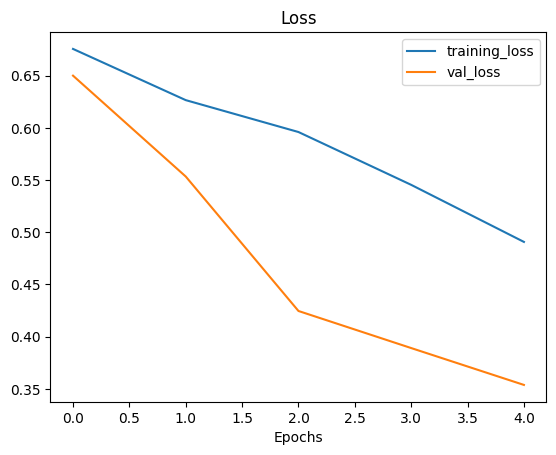

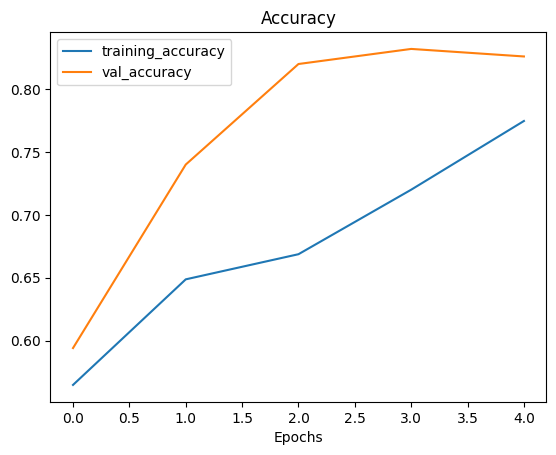

In [ ]:
plot_loss_curves(history_6)

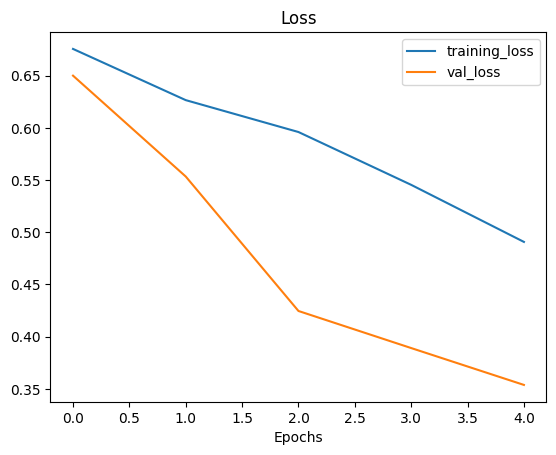

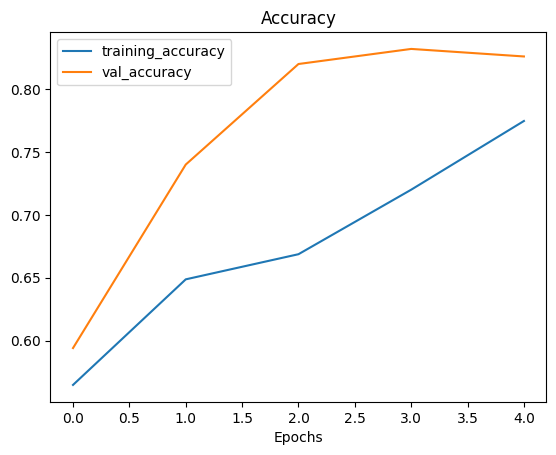

In [ ]:
plot_loss_curves(history_6)

### **Let's shuffle our training data and our augmented training data**
`shuffle = True`

and train another model like before

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                             target_size = (224, 224),
                                                                             batch_size = 32,
                                                                             class_mode = "binary",
                                                                             shuffle = True) # 'shuffle = True' is good model training)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create a model same as top 5 & 6
model_7 = Sequential([
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

# Compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"]
                )

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 540ms/step - loss: 0.6658 - accuracy: 0.5853 - val_loss: 0.5250 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 28s 609ms/step - loss: 0.5760 - accuracy: 0.7020 - val_loss: 0.4313 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 23s 492ms/step - loss: 0.5380 - accuracy: 0.7420 - val_loss: 0.4550 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 24s 520ms/step - loss: 0.5259 - accuracy: 0.7333 - val_loss: 0.3860 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 22s 464ms/step - loss: 0.4949 - accuracy: 0.7620 - val_loss: 0.3787 - val_accuracy: 0.8260


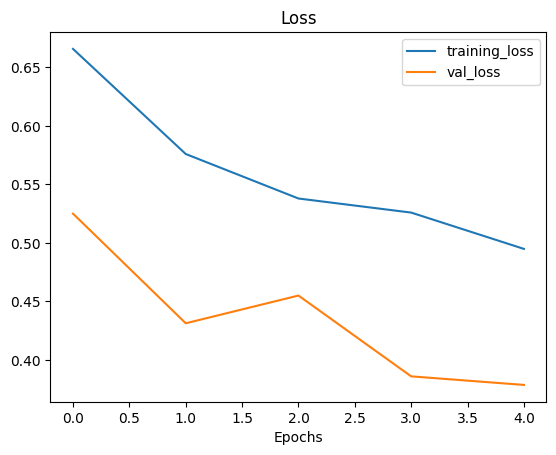

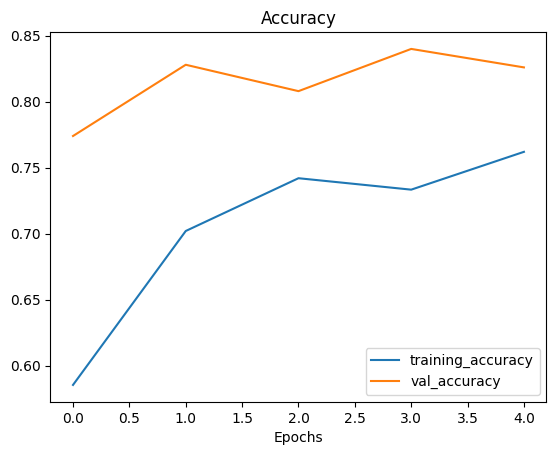

In [ ]:
plot_loss_curves(history_7)

# **7. Predictions**

### **Making Prediction with our trained Model on our Custom data**

In [ ]:
# classes we're working with
print(class_names)

['pizza' 'steak']


In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

--2023-12-25 06:21:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2023-12-25 06:21:25 (149 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



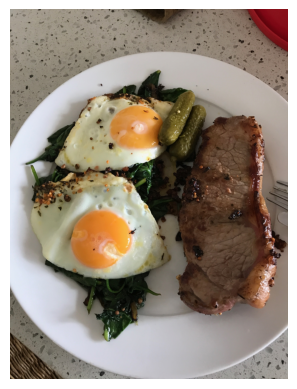

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

(4032, 3024, 3)

## **Preprocessing Test Data**

In [ ]:
# Create a function to import and resize it to be used iwth model

def load_and_prep_image(filename, img_shape = 224):
  """
  Reads an image from filename, turns it into a tensor and
  reshapes it to (img_shape, img_shape, colour_channels).
  """

  # Read in the image
  img = tf.io.read_file(filename)

  # Decod ethe read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image between 0 & 1
  img = img/255.
  return img

In [ ]:
steak = load_and_prep_image("03-steak.jpeg")

In [ ]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis = 0))
pred

1/1 [==============================] - 0s 26ms/step


array([[0.81341034]], dtype=float32)

### **Visualize the image and model prediction**

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):

  """
  imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import target image and preprocess it
  img = load_and_prep_image(filename)

  # Make prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 18ms/step


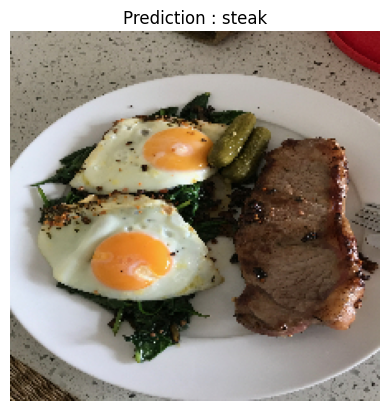

In [ ]:
pred_and_plot(model_7, "03-steak.jpeg")

--2023-12-25 06:57:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-12-25 06:57:30 (214 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 29ms/step


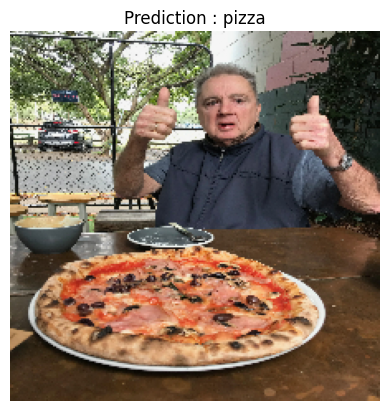

In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg", class_names)